# Haar Random Unitary (simulator)

In [1]:
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram

In [2]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

In [3]:
import sys
sys.path.append("../")

In [4]:
import random
import numpy as np
import importlib
import pickle
import time
from pprint import pprint
import matplotlib.pyplot as plt

In [5]:
from test_unitaries import *

In [6]:
seed = 42 # random seed
num_data = 200 # original: 20000
Nq = 4 # number of qubit
Ns = 1000

In [7]:
results = []

In [8]:
t1 = time.time()
for i in range(1, num_data + 1):
    qc = QuantumCircuit(Nq, Nq)
    qc.append(qi.random_unitary(2 ** Nq, seed = i - 1).to_instruction(), range(Nq))
    qc.measure(range(Nq), range(Nq)[::-1])
    results.append(execute(qc, shots = Ns, backend = Aer.get_backend("qasm_simulator"), seed_transpiler=seed, seed_simulator=seed).result())
    if i % 100 == 0:
        t2 = time.time()
        print("added", i, "th data (", t2 - t1, "s)")
        t1 = t2
        with open("training_data_haar_simulator.pkl", "wb") as f:
            pickle.dump(results, f)

added 100 th data ( 1.065972089767456 s)
added 200 th data ( 0.7076170444488525 s)


- the result data is stored at .pkl file
- you can convert the data from Result type to counts (dict of state (str) to counts (int)) by the following function

In [9]:
def results_to_counts(results):
    counts = []
    for result in results:
        counts.append(result.get_counts())
    return counts

In [10]:
counts = results_to_counts(results)

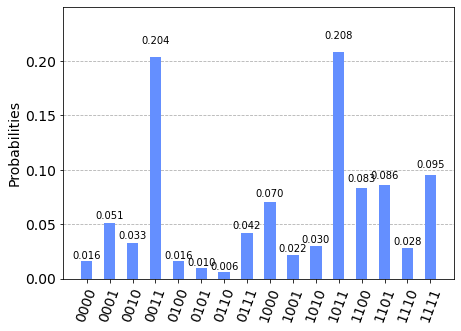

In [11]:
plot_histogram(counts[0])

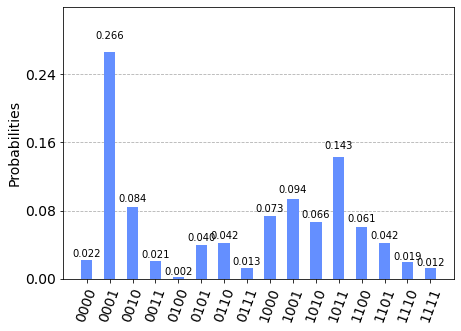

In [12]:
plot_histogram(counts[1])

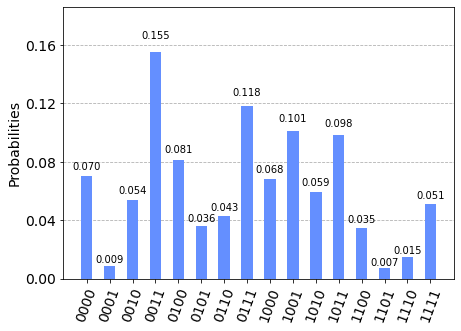

In [13]:
plot_histogram(counts[2])

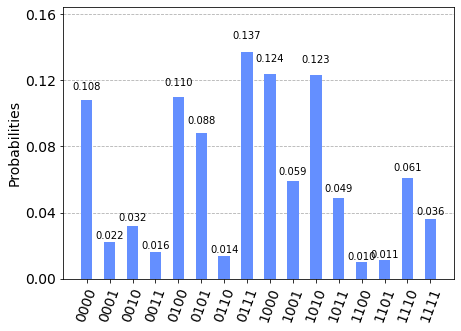

In [14]:
plot_histogram(counts[3])

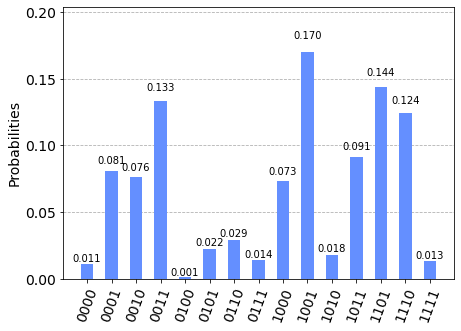

In [15]:
plot_histogram(counts[4])

In [16]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

In [17]:
ibmq_montreal = provider.get_backend("ibmq_montreal")

In [18]:
from qiskit.compiler import transpile
ops = []
depth = []
for D in range(2,9):
    qc = QuantumCircuit(Nq, Nq)
    qc.append(qi.random_unitary(2 ** Nq, seed = 0).to_instruction(), range(Nq))
    tqc = transpile(qc, backend = ibmq_montreal, approximation_degree=0)
    ops.append(tqc.count_ops())
    depth.append(tqc.depth())

In [19]:
ops_rz = [ops[i]["rz"] for i in range(len(ops))]
ops_sx = [ops[i]["sx"] for i in range(len(ops))]
ops_cx = [ops[i]["cx"] for i in range(len(ops))]

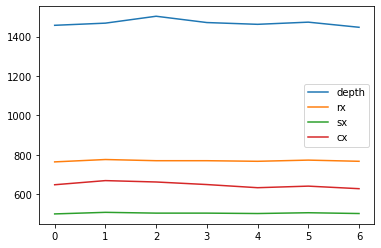

In [20]:
plt.plot(depth)
plt.plot(ops_rz)
plt.plot(ops_sx)
plt.plot(ops_cx)
plt.legend(["depth", "rx", "sx", "cx"])
plt.show()

In [21]:
depth[0], ops[0]

(1457, OrderedDict([('rz', 764), ('cx', 648), ('sx', 500)]))

In [23]:
qc = QuantumCircuit(Nq, Nq)
qc.append(qi.random_unitary(2 ** Nq, seed = 0).to_instruction(), range(Nq))
tqc = transpile(qc, backend = ibmq_montreal, optimization_level=0)
tqc.depth(), tqc.count_ops()

(1934, OrderedDict([('rz', 1308), ('cx', 644), ('sx', 518)]))

In [24]:
qc = QuantumCircuit(Nq, Nq)
qc.append(qi.random_unitary(2 ** Nq, seed = 0).to_instruction(), range(Nq))
tqc = transpile(qc, backend = ibmq_montreal, optimization_level=2)
tqc.depth(), tqc.count_ops()

(1446, OrderedDict([('rz', 764), ('cx', 603), ('sx', 500)]))

In [25]:
qc = QuantumCircuit(Nq, Nq)
qc.append(qi.random_unitary(2 ** Nq, seed = 0).to_instruction(), range(Nq))
tqc = transpile(qc, backend = ibmq_montreal, optimization_level=3)
tqc.depth(), tqc.count_ops()

(1387, OrderedDict([('rz', 857), ('sx', 590), ('cx', 362), ('x', 6)]))